In [177]:
import numpy as np
import pandas as pd
from fancyimpute import IterativeImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [178]:
'''
pre-processes melanoma data

'''

'\npre-processes melanoma data\n\n'

In [179]:
# read in data

raw_data = pd.read_csv('../Melanoma/total_PD_1.csv')
raw_data.head()

/Users/sophiesun/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,GSM2445716,GSM2445717,GSM2445718,GSM2445719,GSM2445720,GSM2445721,GSM2445722,GSM2445723,GSM2445724,...,SRR5088909,SRR5088911,SRR5088913,SRR5088914,SRR5088916,SRR5088920,SRR5088922,SRR5088924,SRR5088926,SRR5088929
0,5S_rRNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.039753,0.1036,0,0,0.0428182,0.138019,0.0139869,0.0539995,0.0914821,0.0727011
1,5_8S_rRNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,7SK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,A1BG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0298032,0.244701,0.172904,0.10584,0.188846,0.102993,0.0440417,0.151334,0.169748,0.0304227
4,A1BG-AS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.410368,1.10834,1.55227,1.59396,1.20657,0.951995,0.117314,0.550993,1.18046,0.645802


In [180]:
# some re-formatting

# rename column

raw_data = raw_data.rename(columns={raw_data.columns[0]: 'patient'})
print(raw_data.shape)


# transpose so columns are genes and rows are patients
t_data = raw_data.set_index('patient').T
# t_data = raw_data.set_index('patient').T
print(t_data.shape)

# drop rows(patient) with resopnse = UNK

t_data = t_data[t_data["Response"] != "UNK"]
print(t_data.shape)
# split data

labels = t_data['Response']
clean_data= t_data.drop(columns = ['Response'])


(56270, 158)
(157, 56270)
(150, 56270)


In [181]:
print(clean_data.index)

Index(['GSM2445716', 'GSM2445717', 'GSM2445718', 'GSM2445719', 'GSM2445720',
       'GSM2445721', 'GSM2445722', 'GSM2445723', 'GSM2445724', 'GSM2445725',
       ...
       'SRR5088909', 'SRR5088911', 'SRR5088913', 'SRR5088914', 'SRR5088916',
       'SRR5088920', 'SRR5088922', 'SRR5088924', 'SRR5088926', 'SRR5088929'],
      dtype='object', length=150)


In [182]:
# filtering

# select GSM24457 samples

gse910_indices = clean_data.index[clean_data.index.str.contains('GSM')]

clean_data = clean_data.loc[gse910_indices]
label = labels.loc[gse910_indices]

# drop any genes with > 90% missing data

clean_data = clean_data.dropna(thresh = clean_data.shape[0]*0.9, how='all', axis=1)
print(clean_data)
print(label)


patient         A2M    ABCB1     ABL1      ADA  ADORA2A    AICDA     AIRE  \
GSM2445716  12.4884    7.016  9.38074  6.82087  4.85041  2.64096   3.3414   
GSM2445717  11.4637  5.43465  8.65705  6.30912  4.61523  3.11273   4.2282   
GSM2445718  12.1104  5.66996  9.85013  8.10566  6.16592  2.96952  3.55448   
GSM2445719  13.3247  6.47553  8.68792  8.26729  5.91365  3.52134  3.52134   
GSM2445720  14.4241  7.22529  9.96367  8.12778  7.74927  4.21583  4.55287   
GSM2445721  13.7715  5.56747  9.67508  6.74434   5.0439  3.36583  4.13137   
GSM2445722  10.6339   11.758  8.69668  6.36448  4.87905  3.87905  4.87905   
GSM2445723  13.3695  6.86984  8.86984  6.99115  7.20688  4.49638  4.49638   
GSM2445724  13.3528  5.96141  9.61304  7.57213  5.33692  4.14427  4.45239   
GSM2445725  13.9343  7.34162  9.41829  6.91979  7.13439  3.19187  5.54943   
GSM2445726  12.7794  5.16227  9.16227  6.67323  5.16227  3.34284  3.71481   
GSM2445727  15.2228  6.64926  8.55747  7.01403  6.85176   3.0444  3.91887   

In [183]:
# drop genes with >80% 0 input 
zero_percent = (clean_data == 0). mean(axis = 0)
clean_data = clean_data.loc[:,zero_percent<0.8]
print(clean_data.shape)

(25, 717)


In [184]:
clean_data_numeric = clean_data.apply(pd.to_numeric, errors='coerce')
print(clean_data_numeric)


patient           A2M      ABCB1       ABL1        ADA   ADORA2A     AICDA  \
GSM2445716  12.488406   7.015997   9.380738   6.820867  4.850411  2.640958   
GSM2445717  11.463665   5.434654   8.657046   6.309123  4.615226  3.112725   
GSM2445718  12.110351   5.669961   9.850125   8.105658  6.165918  2.969521   
GSM2445719  13.324661   6.475534   8.687919   8.267292  5.913655  3.521337   
GSM2445720  14.424133   7.225295   9.963674   8.127778  7.749266  4.215834   
GSM2445721  13.771505   5.567465   9.675080   6.744343  5.043903  3.365832   
GSM2445722  10.633942  11.758025   8.696677   6.364481  4.879054  3.879054   
GSM2445723  13.369547   6.869841   8.869841   6.991147  7.206876  4.496382   
GSM2445724  13.352797   5.961408   9.613042   7.572134  5.336917  4.144272   
GSM2445725  13.934289   7.341621   9.418286   6.919795  7.134389  3.191874   
GSM2445726  12.779427   5.162265   9.162265   6.673227  5.162265  3.342838   
GSM2445727  15.222807   6.649263   8.557471   7.014028  6.851756

In [185]:
col_var = clean_data_numeric.var()
print(col_var.idxmax())
print(col_var.max())

S100A7
24.01667723344217


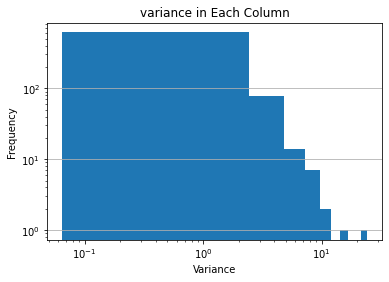

In [186]:
plt.hist(col_var)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.title('variance in Each Column')
plt.grid(axis='y') 
plt.show()

In [187]:
top_100_var = col_var.nlargest(100)
print(top_100_var)
top_100_var.to_csv("_GSE910_top_100_var.csv")

patient
S100A7      24.016677
HLA-DQA1    16.679401
MAGEA3      10.683405
S100A8      10.390855
DMBT1        9.297853
              ...    
MAGEA4       2.544543
LTK          2.512105
IL1A         2.496702
FCER1A       2.493917
CD38         2.493074
Length: 100, dtype: float64


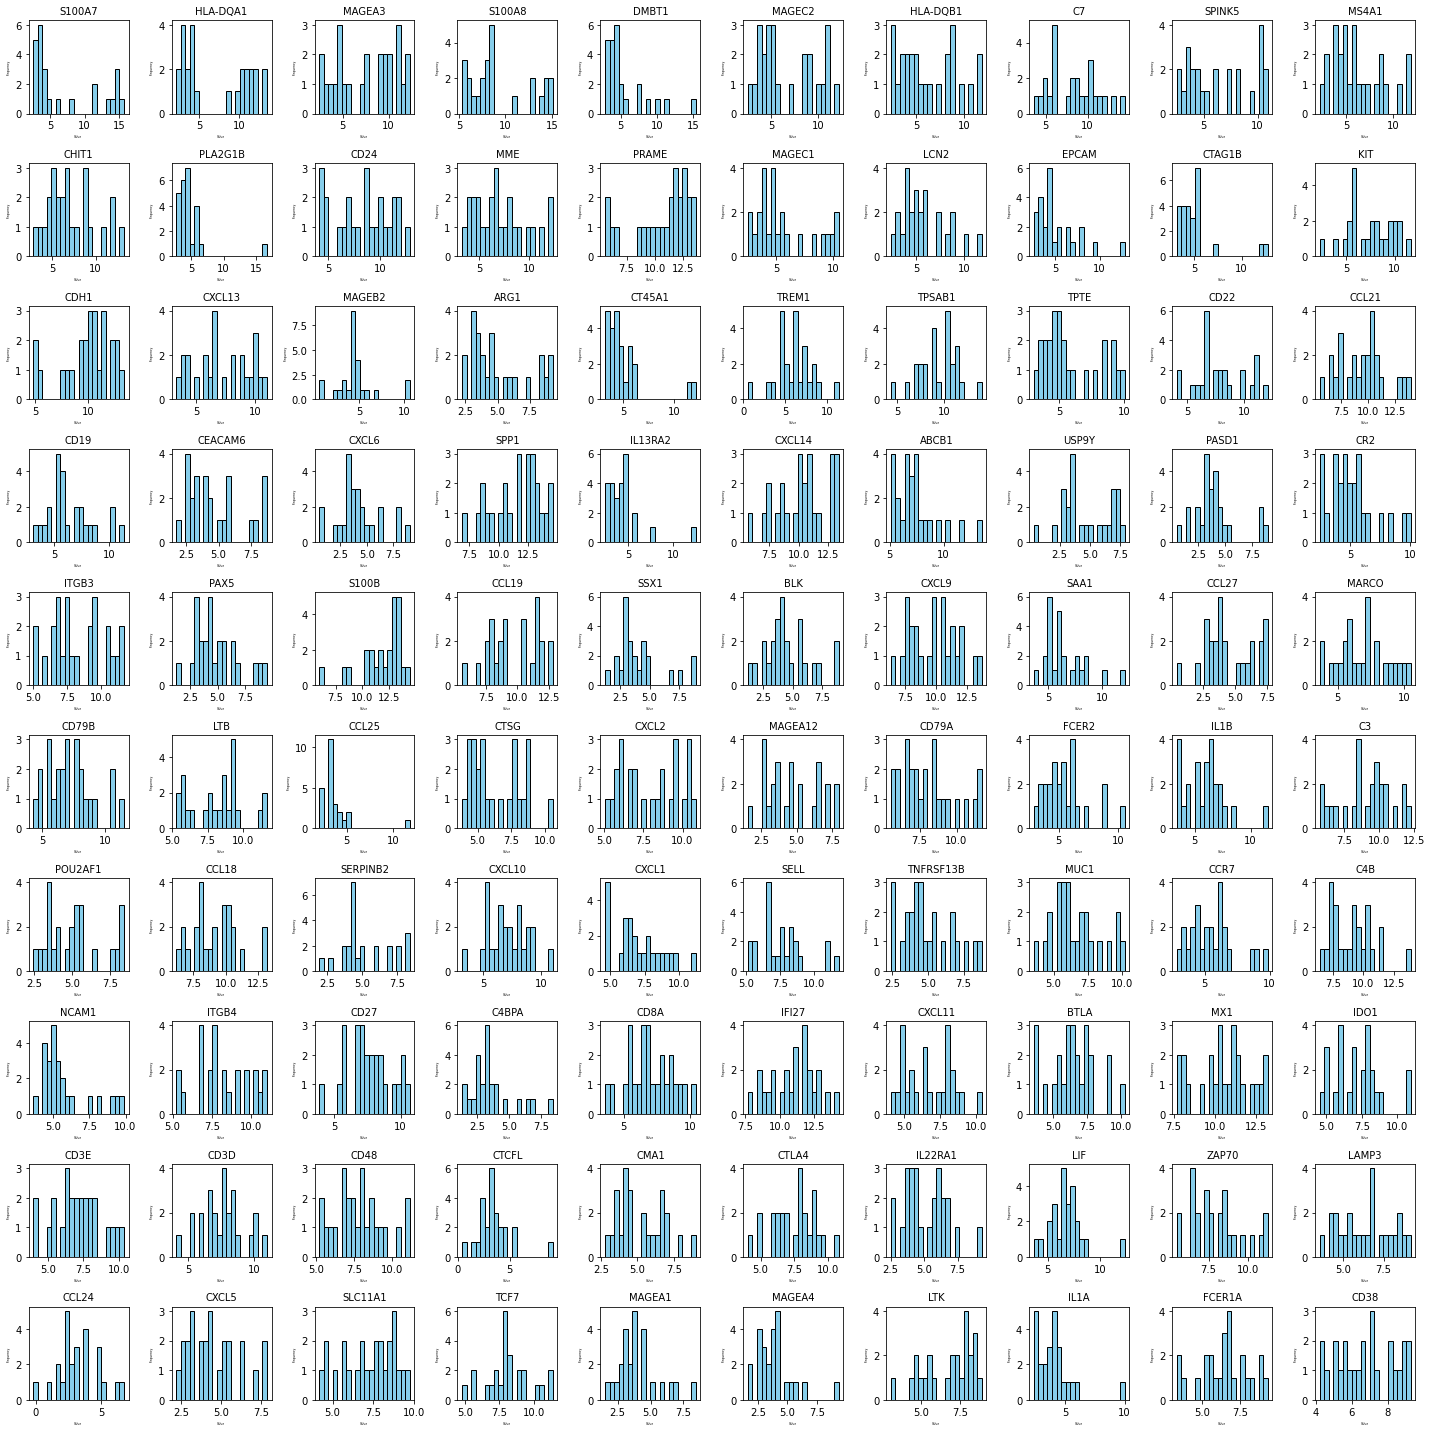

In [188]:
fig, axs = plt.subplots(10, 10, figsize=(20, 20))

axs = axs.flatten()


for i, gene in enumerate(top_100_var.index):

    gene_data = clean_data_numeric[gene]
    
    axs[i].hist(gene_data, bins=20, color='skyblue', edgecolor='black')
    
    axs[i].set_title(f'{gene}', fontsize=10)
    axs[i].set_xlabel('Value', fontsize=3)
    axs[i].set_ylabel('Frequency', fontsize=3)
    

plt.tight_layout()

plt.show()

In [189]:
top_100_var_data = clean_data_numeric[top_100_var.index]
print(top_100_var_data)

patient        S100A7   HLA-DQA1     MAGEA3     S100A8      DMBT1     MAGEC2  \
GSM2445716   8.445089   9.742933   7.629642   8.203200   2.810883  12.168190   
GSM2445717   3.335118  10.294292   2.849691   6.458500   2.849691   2.527763   
GSM2445718  13.917280   3.191914  11.604937  14.242248   7.669961   9.032017   
GSM2445719   2.743730   4.106300  12.302697   8.086122   2.936375   5.521337   
GSM2445720   4.055370   2.552869   3.775262   7.661394  10.092028   3.775262   
GSM2445721   2.628866   3.043903   3.043903   5.329306   3.851258   3.628866   
GSM2445722   4.879054  10.285046   4.879054   7.171836   5.257566   5.142088   
GSM2445723   3.036951   3.621913   9.221826   7.394503   8.552650   4.358879   
GSM2445724   3.452395   2.921880   4.452395   6.144272   3.999883   4.751955   
GSM2445725  14.595153   3.513802  10.821231  14.001039   4.651306   8.909551   
GSM2445726  13.153504   8.529170   2.425300  12.737300   3.577303   3.255375   
GSM2445727   3.459439  11.470666  11.065

In [190]:
# z-score transformation (for PCA)

scaler = StandardScaler()
scaled_values = scaler.fit_transform(top_100_var_data.values)
scaled_data = pd.DataFrame(scaled_values, columns=top_100_var_data.columns, index=top_100_var_data.index)

print(scaled_data.head)

<bound method NDFrame.head of patient       S100A7  HLA-DQA1    MAGEA3    S100A8     DMBT1    MAGEC2  \
GSM2445716  0.289860  0.634494 -0.001243 -0.360320 -0.906716  1.843763   
GSM2445717 -0.774348  0.772281 -1.493807 -0.912727 -0.893726 -1.423186   
GSM2445718  1.429504 -1.002635  1.240063  1.551765  0.719683  0.780976   
GSM2445719 -0.897511 -0.774126  1.457942 -0.397389 -0.864712 -0.408723   
GSM2445720 -0.624348 -1.162335 -1.204793 -0.531867  1.530381 -1.000433   
GSM2445721 -0.921433 -1.039624 -1.433164 -1.270253 -0.558488 -1.050044   
GSM2445722 -0.452806  0.769971 -0.860128 -0.686871 -0.087778 -0.537243   
GSM2445723 -0.836445 -0.895176  0.495924 -0.616370  1.015131 -0.802657   
GSM2445724 -0.749924 -1.070118 -0.993355 -1.012218 -0.508742 -0.669452   
GSM2445725  1.570678 -0.922194  0.995347  1.475394 -0.290702  0.739475   
GSM2445726  1.270439  0.331170 -1.626326  1.075268 -0.650185 -1.176613   
GSM2445727 -0.748457  1.066263  1.071728 -0.190292  1.952866 -0.768579   
GSM24457

In [191]:
# export '/content/total_PD_1.csv'

# imputed log2 transformed data
# imputed_data.to_csv('imputed_data_v3.csv')

# log2 transformed
# log2_data.to_csv('GSE910_log2_top_100.csv')

# normalized version of above^ (for PCA)
scaled_data.to_csv('../data/GSE910_scaled_top_100.csv')

# true labels (response y/n)
labels.to_csv('../data/GSE910_labels.csv')